In [2]:
%pip install pandas
%pip install matplotlib
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
import numpy as np
import pandas as pd

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Lire le fichier CSV
df = pd.read_csv('eco2mix-regional-cons-def.csv', sep = ';',  na_values=['ND'])
# passage de la colonne Date et type date time
df['Date']=pd.to_datetime(df['Date'])
#ajout d'une colonne pour avoir le numéro du jour de la semaine, utile pour comparer les jours de la semaine
df['JourSemaine']=df['Date'].dt.weekday
# Afficher les premières lignes du jeu de données
display(df.head())

C:\Users\LaurieBESINET\AppData\Local\Temp\ipykernel_18724\2847845874.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('eco2mix-regional-cons-def.csv', sep = ';',  na_values=['ND'])


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,JourSemaine
0,44,Grand Est,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,28,Normandie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121408 entries, 0 to 2121407
Data columns (total 33 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Code INSEE région    int64         
 1   Région               object        
 2   Nature               object        
 3   Date                 datetime64[ns]
 4   Heure                object        
 5   Date - Heure         object        
 6   Consommation (MW)    float64       
 7   Thermique (MW)       float64       
 8   Nucléaire (MW)       float64       
 9   Eolien (MW)          object        
 10  Solaire (MW)         float64       
 11  Hydraulique (MW)     float64       
 12  Pompage (MW)         float64       
 13  Bioénergies (MW)     float64       
 14  Ech. physiques (MW)  float64       
 15  Stockage batterie    float64       
 16  Déstockage batterie  float64       
 17  Eolien terrestre     float64       
 18  Eolien offshore      float64       
 19  TCO Thermique (%)    

In [49]:
df.describe()

,Code INSEE région,Date,Consommation (MW),Thermique (MW),Nucléaire (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),...,TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,JourSemaine
count,2.121408e+06,2121408,2.121396e+06,2.121396e+06,1.420121e+06,2.121396e+06,2.121396e+06,1.385081e+06,2.121396e+06,2.121396e+06,...,649152.000000,649152.000000,649152.000000,649152.000000,649152.000000,649152.000000,649152.000000,649152.000000,0.0,2.121408e+06
mean,4.991667e+01,2018-01-15 23:59:59.999998976,4.473428e+03,3.819193e+02,5.317125e+03,9.694712e+01,5.894726e+02,-1.013165e+02,8.495074e+01,-4.390067e+02,...,9.534782,24.785039,3.446087,13.620191,10.492070,27.551007,2.387604,55.515108,NaN,2.999457e+00
min,1.100000e+01,2013-01-01 00:00:00,7.030000e+02,-8.300000e+01,-1.440000e+02,-2.300000e+01,-6.000000e+00,-2.580000e+03,4.000000e+00,-1.278700e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.520000,7.280000,NaN,0.000000e+00
25%,2.775000e+01,2015-07-10 00:00:00,2.768000e+03,2.500000e+01,2.545000e+03,0.000000e+00,5.000000e+00,-7.000000e+00,4.900000e+01,-4.044000e+03,...,1.050000,6.600000,0.000000,0.000000,0.110000,10.700000,1.730000,48.300000,NaN,1.000000e+00
50%,4.800000e+01,2018-01-16 00:00:00,4.102000e+03,1.610000e+02,5.201000e+03,0.000000e+00,5.500000e+01,0.000000e+00,7.700000e+01,5.790000e+02,...,4.560000,17.790000,0.030000,0.150000,1.980000,25.000000,2.190000,57.140000,NaN,3.000000e+00
75%,7.525000e+01,2020-07-25 00:00:00,5.708000e+03,5.010000e+02,8.170000e+03,7.000000e+01,8.610000e+02,0.000000e+00,1.170000e+02,2.214000e+03,...,13.210000,37.320000,3.120000,22.690000,16.390000,42.110000,2.840000,64.710000,NaN,5.000000e+00
max,9.300000e+01,2023-01-31 00:00:00,1.533800e+04,4.293000e+03,1.363200e+04,2.882000e+03,8.468000e+03,0.000000e+00,2.300000e+03,1.395900e+04,...,134.570000,125.560000,81.760000,112.430000,115.960000,2575.000000,21.310000,718.750000,NaN,6.000000e+00
std,2.564001e+01,NaN,2.162117e+03,5.406399e+02,3.511277e+03,2.385389e+02,1.014269e+03,2.948698e+02,4.524922e+01,4.297298e+03,...,12.632893,22.514906,7.492785,20.649650,15.401464,24.104315,0.920593,12.575279,NaN,2.000000e+00


In [7]:
col = df['Code INSEE région']
print(col.info())
col.value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 2121408 entries, 0 to 2121407
Series name: Code INSEE région
Non-Null Count    Dtype
--------------    -----
2121408 non-null  int64
dtypes: int64(1)
memory usage: 16.2 MB
None


Code INSEE région
44    176784
84    176784
27    176784
93    176784
28    176784
76    176784
53    176784
11    176784
24    176784
75    176784
32    176784
52    176784
Name: count, dtype: int64

In [8]:
col = df['Région']
print(col.info())
col.value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 2121408 entries, 0 to 2121407
Series name: Région
Non-Null Count    Dtype 
--------------    ----- 
2121408 non-null  object
dtypes: object(1)
memory usage: 16.2+ MB
None


Région
Grand Est                     176784
Auvergne-Rhône-Alpes          176784
Bourgogne-Franche-Comté       176784
Provence-Alpes-Côte d'Azur    176784
Normandie                     176784
Occitanie                     176784
Bretagne                      176784
Île-de-France                 176784
Centre-Val de Loire           176784
Nouvelle-Aquitaine            176784
Hauts-de-France               176784
Pays de la Loire              176784
Name: count, dtype: int64

In [14]:
df.isna().any()

Code INSEE région      False
Région                 False
Nature                 False
Date                   False
Heure                  False
Date - Heure           False
Consommation (MW)       True
Thermique (MW)          True
Nucléaire (MW)          True
Eolien (MW)            False
Solaire (MW)            True
Hydraulique (MW)        True
Pompage (MW)            True
Bioénergies (MW)        True
Ech. physiques (MW)     True
Stockage batterie       True
Déstockage batterie     True
Eolien terrestre        True
Eolien offshore         True
TCO Thermique (%)       True
TCH Thermique (%)       True
TCO Nucléaire (%)       True
TCH Nucléaire (%)       True
TCO Eolien (%)          True
TCH Eolien (%)          True
TCO Solaire (%)         True
TCH Solaire (%)         True
TCO Hydraulique (%)     True
TCH Hydraulique (%)     True
TCO Bioénergies (%)     True
TCH Bioénergies (%)     True
Column 30               True
dtype: bool

------------- info :
<class 'pandas.core.series.Series'>
RangeIndex: 2121408 entries, 0 to 2121407
Series name: Consommation (MW)
Non-Null Count    Dtype  
--------------    -----  
2121396 non-null  float64
dtypes: float64(1)
memory usage: 16.2 MB
None
------------- describe :
count    2.121396e+06
mean     4.473428e+03
std      2.162117e+03
min      7.030000e+02
25%      2.768000e+03
50%      4.102000e+03
75%      5.708000e+03
max      1.533800e+04
Name: Consommation (MW), dtype: float64
------------- value counts :
Consommation (MW)
2461.0     537
2455.0     526
2504.0     525
2435.0     523
2511.0     522
          ... 
14636.0      1
14685.0      1
14556.0      1
14404.0      1
15196.0      1
Name: count, Length: 13318, dtype: int64

------------- % de NA :
0.0005656620508643316 % de na
------------- aperçu des lignes avec NA :


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,JourSemaine
0,44,Grand Est,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,28,Normandie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,76,Occitanie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,53,Bretagne,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,11,Île-de-France,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,24,Centre-Val de Loire,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,75,Nouvelle-Aquitaine,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


------------- distribution :


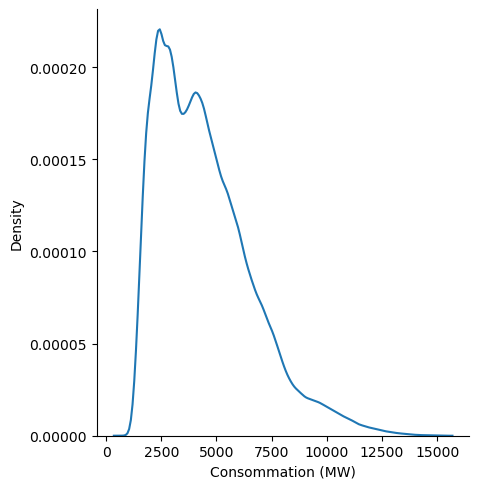

In [4]:
col = df['Consommation (MW)']

print('------------- info :')
print(col.info())
print('------------- describe :')
print(col.describe())
print('------------- value counts :')
print(col.value_counts())
print()
print('------------- % de NA :')
print(col.isna().sum() / len(col) * 100 , '% de na')
print('------------- aperçu des lignes avec NA :')
display(df.loc[col.isna()])
print('------------- distribution :')
sns.displot(col, kind= 'kde')

------------- info :
<class 'pandas.core.series.Series'>
RangeIndex: 2121408 entries, 0 to 2121407
Series name: TCH Eolien (%)
Non-Null Count   Dtype  
--------------   -----  
649152 non-null  float64
dtypes: float64(1)
memory usage: 16.2 MB
None
------------- describe :
count    649152.000000
mean         24.785039
std          22.514906
min           0.000000
25%           6.600000
50%          17.790000
75%          37.320000
max         125.560000
Name: TCH Eolien (%), dtype: float64
------------- value counts :
TCH Eolien (%)
0.00     10334
2.08      1934
1.03      1898
2.06      1564
3.09      1459
         ...  
90.77        1
94.23        1
93.92        1
91.07        1
87.52        1
Name: count, Length: 9653, dtype: int64

------------- % de NA :
69.39994569644313 % de na
------------- aperçu des lignes avec NA :


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,JourSemaine
0,44,Grand Est,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,28,Normandie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472251,28,Normandie,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,4242.0,350.0,5018.0,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472252,53,Bretagne,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,3310.0,240.0,NaN,117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472253,24,Centre-Val de Loire,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,2839.0,105.0,8024.0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472254,27,Bourgogne-Franche-Comté,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,2747.0,181.0,NaN,265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


------------- distribution :


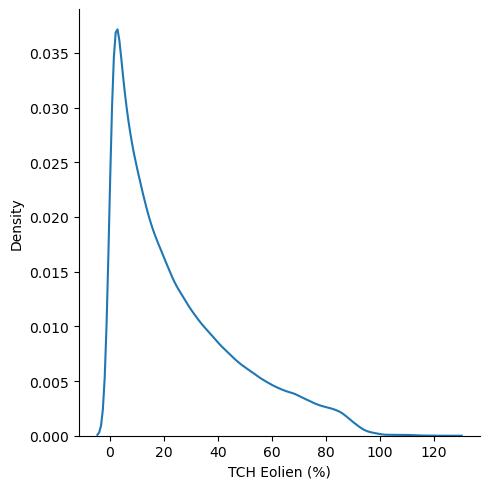

In [13]:
col=df['TCH Eolien (%)']
print('------------- info :')
print(col.info())
print('------------- describe :')
print(col.describe())
print('------------- value counts :')
print(col.value_counts())
print()
print('------------- % de NA :')
print(col.isna().sum() / len(col) * 100 , '% de na')
print('------------- aperçu des lignes avec NA :')
display(df.loc[col.isna()])
print('------------- distribution :')
sns.displot(col, kind= 'kde')


<Axes: ylabel='TCH Eolien (%)'>

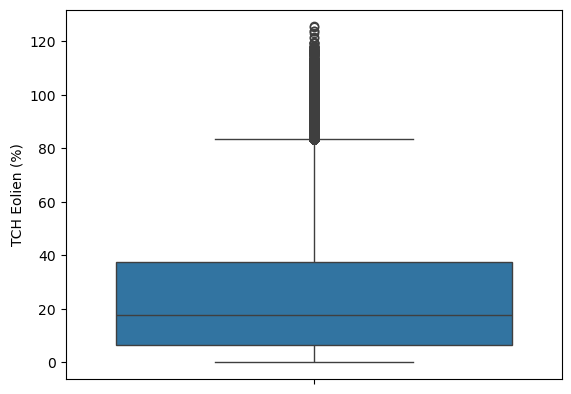

In [14]:
sns.boxplot(col)

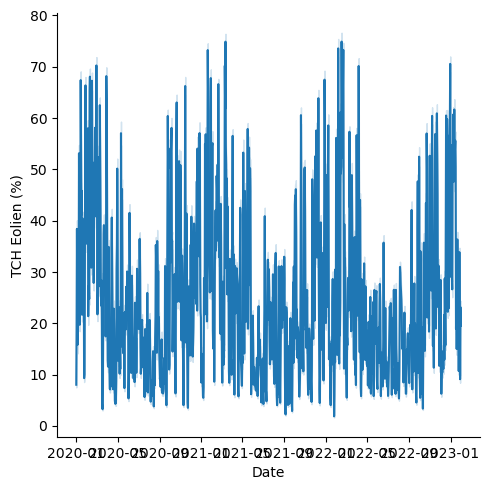

In [54]:
sns.relplot(data = df, y='TCH Eolien (%)', x='Date', kind = 'line')

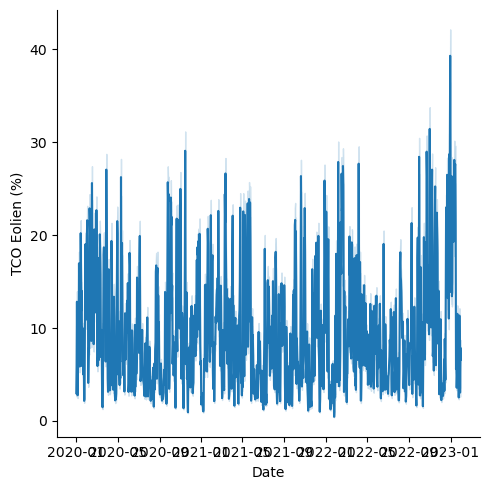

In [55]:
sns.relplot(data = df, y='TCO Eolien (%)', x='Date', kind = 'line')

------------- info :
<class 'pandas.core.series.Series'>
RangeIndex: 2121408 entries, 0 to 2121407
Series name: TCO Eolien (%)
Non-Null Count   Dtype  
--------------   -----  
649152 non-null  float64
dtypes: float64(1)
memory usage: 16.2 MB
None
------------- describe :
count    649152.000000
mean          9.534782
std          12.632893
min           0.000000
25%           1.050000
50%           4.560000
75%          13.210000
max         134.570000
Name: TCO Eolien (%), dtype: float64
------------- value counts :
TCO Eolien (%)
0.00     10334
0.02      3581
0.03      3117
0.05      2782
0.04      2448
         ...  
76.79        1
71.53        1
80.06        1
68.61        1
62.41        1
Name: count, Length: 8478, dtype: int64

------------- % de NA :
69.39994569644313 % de na
------------- aperçu des lignes avec NA :


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,JourSemaine
0,44,Grand Est,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,28,Normandie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472251,28,Normandie,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,4242.0,350.0,5018.0,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472252,53,Bretagne,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,3310.0,240.0,NaN,117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472253,24,Centre-Val de Loire,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,2839.0,105.0,8024.0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472254,27,Bourgogne-Franche-Comté,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,2747.0,181.0,NaN,265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


------------- distribution :


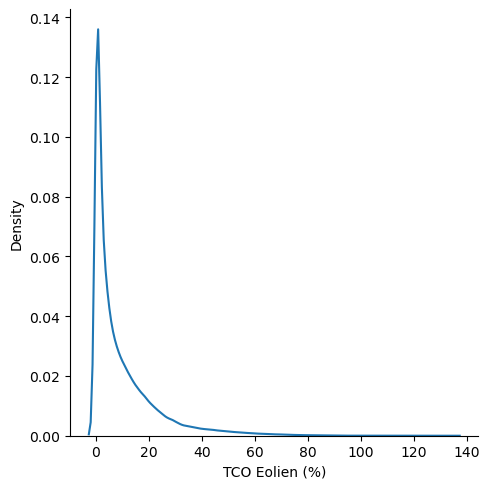

In [15]:
col=df['TCO Eolien (%)']
print('------------- info :')
print(col.info())
print('------------- describe :')
print(col.describe())
print('------------- value counts :')
print(col.value_counts())
print()
print('------------- % de NA :')
print(col.isna().sum() / len(col) * 100 , '% de na')
print('------------- aperçu des lignes avec NA :')
display(df.loc[col.isna()])
print('------------- distribution :')
sns.displot(col, kind= 'kde')

------------- info :
<class 'pandas.core.series.Series'>
RangeIndex: 2121408 entries, 0 to 2121407
Series name: TCO Solaire (%)
Non-Null Count   Dtype  
--------------   -----  
649152 non-null  float64
dtypes: float64(1)
memory usage: 16.2 MB
None
------------- describe :
count    649152.000000
mean          3.446087
std           7.492785
min           0.000000
25%           0.000000
50%           0.030000
75%           3.120000
max          81.760000
Name: TCO Solaire (%), dtype: float64
------------- value counts :
TCO Solaire (%)
0.00     307846
0.02      10918
0.03       6818
0.04       4630
0.05       3503
          ...  
68.20         1
78.75         1
80.80         1
67.34         1
47.87         1
Name: count, Length: 5824, dtype: int64

------------- % de NA :
69.39994569644313 % de na
------------- aperçu des lignes avec NA :


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,JourSemaine
0,44,Grand Est,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,28,Normandie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472251,28,Normandie,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,4242.0,350.0,5018.0,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472252,53,Bretagne,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,3310.0,240.0,NaN,117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472253,24,Centre-Val de Loire,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,2839.0,105.0,8024.0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472254,27,Bourgogne-Franche-Comté,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,2747.0,181.0,NaN,265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


------------- distribution :


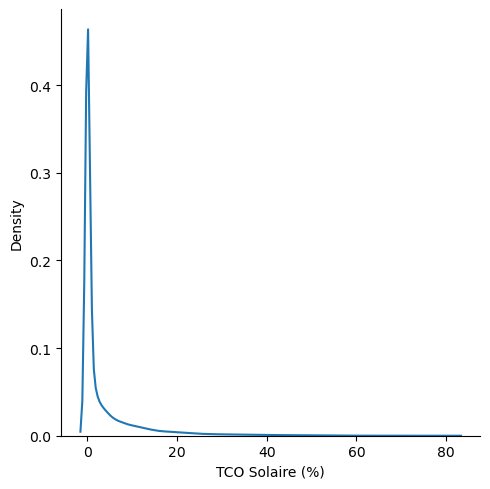

In [16]:
col=df['TCO Solaire (%)']
print('------------- info :')
print(col.info())
print('------------- describe :')
print(col.describe())
print('------------- value counts :')
print(col.value_counts())
print()
print('------------- % de NA :')
print(col.isna().sum() / len(col) * 100 , '% de na')
print('------------- aperçu des lignes avec NA :')
display(df.loc[col.isna()])
print('------------- distribution :')
sns.displot(col, kind= 'kde')

------------- info :
<class 'pandas.core.series.Series'>
RangeIndex: 2121408 entries, 0 to 2121407
Series name: TCH Solaire (%)
Non-Null Count   Dtype  
--------------   -----  
649152 non-null  float64
dtypes: float64(1)
memory usage: 16.2 MB
None
------------- describe :
count    649152.000000
mean         13.620191
std          20.649650
min           0.000000
25%           0.000000
50%           0.150000
75%          22.690000
max         112.430000
Name: TCH Solaire (%), dtype: float64
------------- value counts :
TCH Solaire (%)
0.00     307846
0.04       3392
0.11       3023
0.40       2869
0.03       2268
          ...  
77.36         1
82.18         1
88.92         1
81.89         1
89.86         1
Name: count, Length: 8408, dtype: int64

------------- % de NA :
69.39994569644313 % de na
------------- aperçu des lignes avec NA :


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,JourSemaine
0,44,Grand Est,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,28,Normandie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472251,28,Normandie,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,4242.0,350.0,5018.0,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472252,53,Bretagne,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,3310.0,240.0,NaN,117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472253,24,Centre-Val de Loire,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,2839.0,105.0,8024.0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472254,27,Bourgogne-Franche-Comté,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,2747.0,181.0,NaN,265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


------------- distribution :


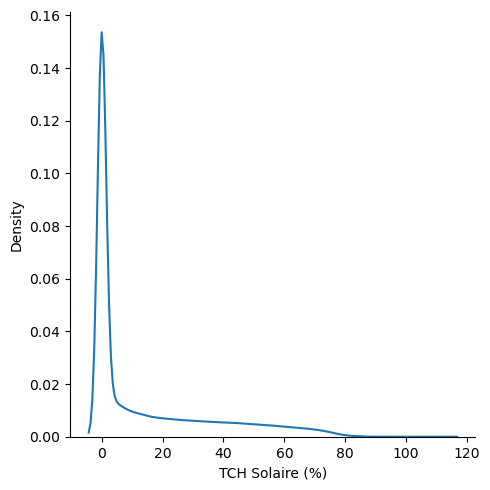

In [17]:
col=df['TCH Solaire (%)']
print('------------- info :')
print(col.info())
print('------------- describe :')
print(col.describe())
print('------------- value counts :')
print(col.value_counts())
print()
print('------------- % de NA :')
print(col.isna().sum() / len(col) * 100 , '% de na')
print('------------- aperçu des lignes avec NA :')
display(df.loc[col.isna()])
print('------------- distribution :')
sns.displot(col, kind= 'kde')

<Axes: ylabel='TCH Solaire (%)'>

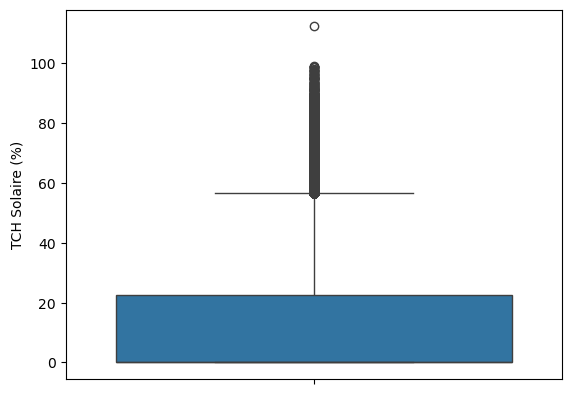

In [75]:
sns.boxplot(col)

------------- info :
<class 'pandas.core.series.Series'>
RangeIndex: 2121408 entries, 0 to 2121407
Series name: TCO Hydraulique (%)
Non-Null Count   Dtype  
--------------   -----  
649152 non-null  float64
dtypes: float64(1)
memory usage: 16.2 MB
None
------------- describe :
count    649152.000000
mean         10.492070
std          15.401464
min           0.000000
25%           0.110000
50%           1.980000
75%          16.390000
max         115.960000
Name: TCO Hydraulique (%), dtype: float64
------------- value counts :
TCO Hydraulique (%)
0.00     34010
0.04     20284
0.03     16107
0.05     15385
0.02     14829
         ...  
84.88        1
83.90        1
77.15        1
84.80        1
70.31        1
Name: count, Length: 8687, dtype: int64

------------- % de NA :
69.39994569644313 % de na
------------- aperçu des lignes avec NA :


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,JourSemaine
0,44,Grand Est,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,28,Normandie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472251,28,Normandie,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,4242.0,350.0,5018.0,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472252,53,Bretagne,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,3310.0,240.0,NaN,117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472253,24,Centre-Val de Loire,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,2839.0,105.0,8024.0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472254,27,Bourgogne-Franche-Comté,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,2747.0,181.0,NaN,265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


------------- distribution :


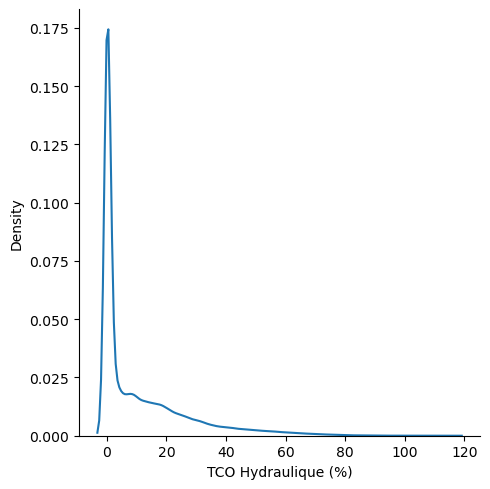

In [18]:
col=df['TCO Hydraulique (%)']
print('------------- info :')
print(col.info())
print('------------- describe :')
print(col.describe())
print('------------- value counts :')
print(col.value_counts())
print()
print('------------- % de NA :')
print(col.isna().sum() / len(col) * 100 , '% de na')
print('------------- aperçu des lignes avec NA :')
display(df.loc[col.isna()])
print('------------- distribution :')
sns.displot(col, kind= 'kde')

<Axes: ylabel='TCO Hydraulique (%)'>

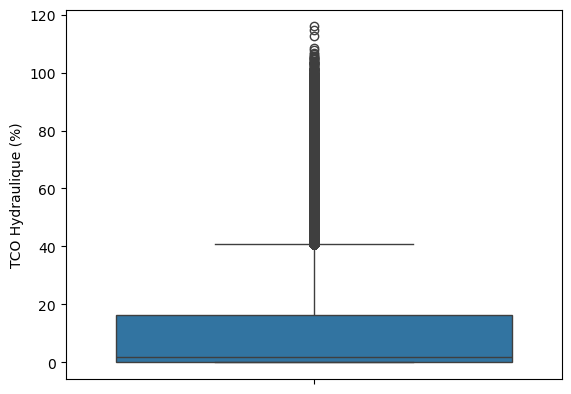

In [77]:
sns.boxplot(col)

------------- info :
<class 'pandas.core.series.Series'>
RangeIndex: 2121408 entries, 0 to 2121407
Series name: TCH Hydraulique (%)
Non-Null Count   Dtype  
--------------   -----  
649152 non-null  float64
dtypes: float64(1)
memory usage: 16.2 MB
None
------------- describe :
count    649152.000000
mean         27.551007
std          24.104315
min           0.000000
25%          10.700000
50%          25.000000
75%          42.110000
max        2575.000000
Name: TCH Hydraulique (%), dtype: float64
------------- value counts :
TCH Hydraulique (%)
50.00    35385
0.00     34010
25.00    19353
1.09     10756
40.00    10402
         ...  
71.88        1
71.66        1
74.31        1
74.04        1
64.98        1
Name: count, Length: 7637, dtype: int64

------------- % de NA :
69.39994569644313 % de na
------------- aperçu des lignes avec NA :


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,JourSemaine
0,44,Grand Est,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,28,Normandie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472251,28,Normandie,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,4242.0,350.0,5018.0,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472252,53,Bretagne,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,3310.0,240.0,NaN,117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472253,24,Centre-Val de Loire,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,2839.0,105.0,8024.0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1472254,27,Bourgogne-Franche-Comté,Données définitives,2019-12-31,23:30,2019-12-31T22:30:00+00:00,2747.0,181.0,NaN,265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


------------- distribution :


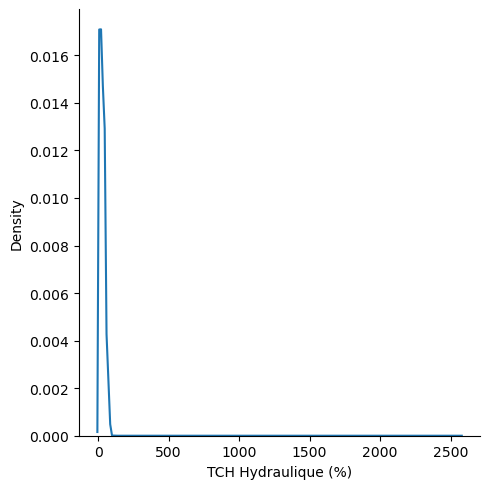

In [19]:
col=df['TCH Hydraulique (%)']
print('------------- info :')
print(col.info())
print('------------- describe :')
print(col.describe())
print('------------- value counts :')
print(col.value_counts())
print()
print('------------- % de NA :')
print(col.isna().sum() / len(col) * 100 , '% de na')
print('------------- aperçu des lignes avec NA :')
display(df.loc[col.isna()])
print('------------- distribution :')
sns.displot(col, kind= 'kde')

In [48]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Code INSEE région               int64
Région                         object
Nature                         object
Date                   datetime64[ns]
Heure                          object
Date - Heure                   object
Consommation (MW)             float64
Thermique (MW)                float64
Nucléaire (MW)                float64
Eolien (MW)                    object
Solaire (MW)                  float64
Hydraulique (MW)              float64
Pompage (MW)                  float64
Bioénergies (MW)              float64
Ech. physiques (MW)           float64
Stockage batterie             float64
Déstockage batterie           float64
Eolien terrestre              float64
Eolien offshore               float64
TCO Thermique (%)             float64
TCH Thermique (%)             float64
TCO Nucléaire (%)             float64
TCH Nucléaire (%)             float64
TCO Eolien (%)                float64
TCH Eolien (%)                float64
TCO Solaire (%)               float64
TCH Solaire 

In [47]:
before_2020 = df.loc[df['Date'] < '2020-01-01']
after_2020 = df.loc[df['Date'] >= '2020-01-01']

pd.DataFrame({
"nb na after" : after_2020.isna().sum(),
"% na after/ na total" :round(after_2020.isna().sum() / df.isna().sum() * 100, 2) ,
"% na after / nb lignes after" : round(after_2020.isna().sum() / len(after_2020) *100, 2),
"nb na before" : before_2020.isna().sum(),
"% na before / na total" : round(before_2020.isna().sum() / df.isna().sum() * 100, 2),
"% na before / nb lignes before" : round(before_2020.isna().sum() / len(before_2020) *100 , 2), })


,nb na after,% na after/ na total,% na after / nb lignes after,nb na before,% na before / na total,% na before / nb lignes before
Code INSEE région,0,NaN,0.00,0,NaN,0.00
Région,0,NaN,0.00,0,NaN,0.00
Nature,0,NaN,0.00,0,NaN,0.00
Date,0,NaN,0.00,0,NaN,0.00
Heure,0,NaN,0.00,0,NaN,0.00
Date - Heure,0,NaN,0.00,0,NaN,0.00
Consommation (MW),0,0.00,0.00,12,100.00,0.00
Thermique (MW),0,0.00,0.00,12,100.00,0.00
Nucléaire (MW),87840,12.53,13.53,613447,87.47,41.67
Eolien (MW),0,0.00,0.00,12,100.00,0.00


------------- info :
<class 'pandas.core.series.Series'>
RangeIndex: 2121408 entries, 0 to 2121407
Series name: Eolien terrestre
Non-Null Count   Dtype  
--------------   -----  
438324 non-null  float64
dtypes: float64(1)
memory usage: 16.2 MB
None
------------- describe :
count    438324.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Eolien terrestre, dtype: float64
------------- value counts :
Eolien terrestre
0.0    438324
Name: count, dtype: int64

------------- % de NA :
79.33806226807856 % de na
------------- aperçu des lignes avec NA :


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,JourSemaine
0,44,Grand Est,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,28,Normandie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683079,27,Bourgogne-Franche-Comté,Données définitives,2021-01-01,00:00,2020-12-31T23:00:00+00:00,2682.0,134.0,0.0,45,...,1.68,5.21,0.00,0.0,2.80,14.34,1.49,51.95,NaN,4
1683080,84,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,00:00,2020-12-31T23:00:00+00:00,8586.0,156.0,10710.0,66,...,0.77,11.81,0.00,0.0,36.06,26.25,1.55,71.12,NaN,4
1683081,44,Grand Est,Données définitives,2021-01-01,00:00,2020-12-31T23:00:00+00:00,5348.0,1088.0,9218.0,225,...,4.21,5.83,0.00,0.0,18.77,43.48,2.28,50.62,NaN,4
1683082,53,Bretagne,Données définitives,2021-01-01,00:00,2020-12-31T23:00:00+00:00,3993.0,232.0,0.0,2,...,0.05,0.19,0.03,0.4,4.63,67.27,1.28,67.11,NaN,4


------------- distribution :


C:\Users\LaurieBESINET\AppData\Local\Temp\ipykernel_18724\1743195817.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(col, kind= 'kde')


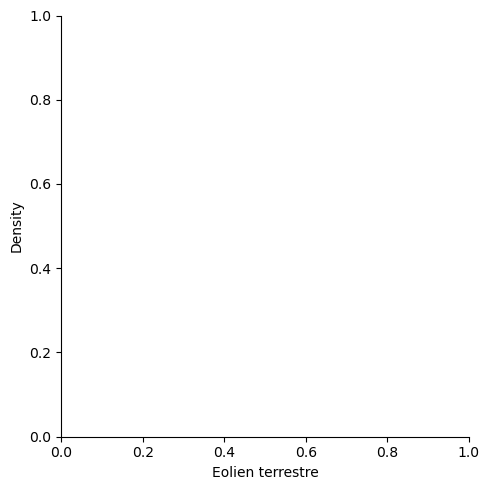

In [5]:
col=df['Eolien terrestre']
print('------------- info :')
print(col.info())
print('------------- describe :')
print(col.describe())
print('------------- value counts :')
print(col.value_counts())
print()
print('------------- % de NA :')
print(col.isna().sum() / len(col) * 100 , '% de na')
print('------------- aperçu des lignes avec NA :')
display(df.loc[col.isna()])
print('------------- distribution :')
sns.displot(col, kind= 'kde')

------------- info :
<class 'pandas.core.series.Series'>
RangeIndex: 2121408 entries, 0 to 2121407
Series name: Eolien offshore
Non-Null Count   Dtype  
--------------   -----  
438324 non-null  float64
dtypes: float64(1)
memory usage: 16.2 MB
None
------------- describe :
count    438324.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Eolien offshore, dtype: float64
------------- value counts :
Eolien offshore
0.0    438324
Name: count, dtype: int64

------------- % de NA :
79.33806226807856 % de na
------------- aperçu des lignes avec NA :


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,JourSemaine
0,44,Grand Est,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,28,Normandie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683079,27,Bourgogne-Franche-Comté,Données définitives,2021-01-01,00:00,2020-12-31T23:00:00+00:00,2682.0,134.0,0.0,45,...,1.68,5.21,0.00,0.0,2.80,14.34,1.49,51.95,NaN,4
1683080,84,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,00:00,2020-12-31T23:00:00+00:00,8586.0,156.0,10710.0,66,...,0.77,11.81,0.00,0.0,36.06,26.25,1.55,71.12,NaN,4
1683081,44,Grand Est,Données définitives,2021-01-01,00:00,2020-12-31T23:00:00+00:00,5348.0,1088.0,9218.0,225,...,4.21,5.83,0.00,0.0,18.77,43.48,2.28,50.62,NaN,4
1683082,53,Bretagne,Données définitives,2021-01-01,00:00,2020-12-31T23:00:00+00:00,3993.0,232.0,0.0,2,...,0.05,0.19,0.03,0.4,4.63,67.27,1.28,67.11,NaN,4


------------- distribution :


C:\Users\LaurieBESINET\AppData\Local\Temp\ipykernel_18724\3154112593.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(col, kind= 'kde')


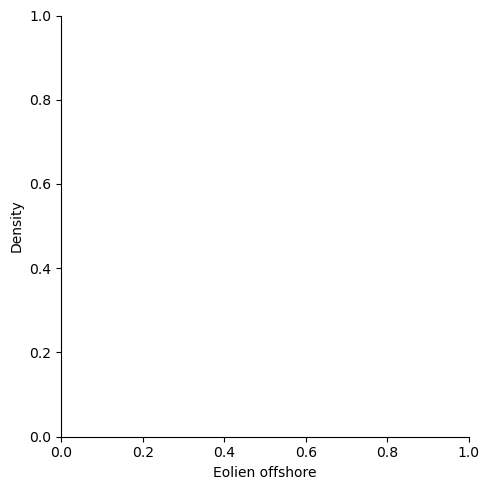

In [6]:
col=df['Eolien offshore']
print('------------- info :')
print(col.info())
print('------------- describe :')
print(col.describe())
print('------------- value counts :')
print(col.value_counts())
print()
print('------------- % de NA :')
print(col.isna().sum() / len(col) * 100 , '% de na')
print('------------- aperçu des lignes avec NA :')
display(df.loc[col.isna()])
print('------------- distribution :')
sns.displot(col, kind= 'kde')

------------- info :
<class 'pandas.core.series.Series'>
RangeIndex: 2121408 entries, 0 to 2121407
Series name: Déstockage batterie
Non-Null Count   Dtype  
--------------   -----  
438324 non-null  float64
dtypes: float64(1)
memory usage: 16.2 MB
None
------------- describe :
count    438324.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Déstockage batterie, dtype: float64
------------- value counts :
Déstockage batterie
0.0    438324
Name: count, dtype: int64

------------- % de NA :
79.33806226807856 % de na
------------- aperçu des lignes avec NA :


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,JourSemaine
0,44,Grand Est,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,28,Normandie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683079,27,Bourgogne-Franche-Comté,Données définitives,2021-01-01,00:00,2020-12-31T23:00:00+00:00,2682.0,134.0,0.0,45,...,1.68,5.21,0.00,0.0,2.80,14.34,1.49,51.95,NaN,4
1683080,84,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,00:00,2020-12-31T23:00:00+00:00,8586.0,156.0,10710.0,66,...,0.77,11.81,0.00,0.0,36.06,26.25,1.55,71.12,NaN,4
1683081,44,Grand Est,Données définitives,2021-01-01,00:00,2020-12-31T23:00:00+00:00,5348.0,1088.0,9218.0,225,...,4.21,5.83,0.00,0.0,18.77,43.48,2.28,50.62,NaN,4
1683082,53,Bretagne,Données définitives,2021-01-01,00:00,2020-12-31T23:00:00+00:00,3993.0,232.0,0.0,2,...,0.05,0.19,0.03,0.4,4.63,67.27,1.28,67.11,NaN,4


------------- distribution :


C:\Users\LaurieBESINET\AppData\Local\Temp\ipykernel_18724\3046261710.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(col, kind= 'kde')


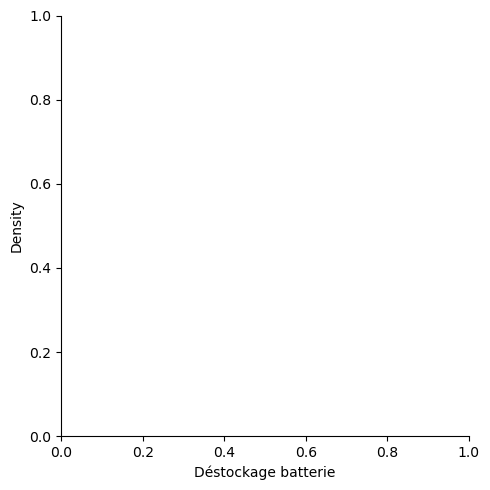

In [9]:
col=df['Déstockage batterie']
print('------------- info :')
print(col.info())
print('------------- describe :')
print(col.describe())
print('------------- value counts :')
print(col.value_counts())
print()
print('------------- % de NA :')
print(col.isna().sum() / len(col) * 100 , '% de na')
print('------------- aperçu des lignes avec NA :')
display(df.loc[col.isna()])
print('------------- distribution :')
sns.displot(col, kind= 'kde')